# ARIMA-BTC.v3
## ARIMA Model

Tutorial A

In [1]:
# import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

import warnings
warnings.filterwarnings("ignore")

In [2]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize = fig_size)
    layout = (2, 2)
    
    ax_xt   = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf  = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [3]:
# Load the data set

df = yf.download('BTC-USD')
# Display the records
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400


In [4]:
# Display the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2759 entries, 2014-09-17 to 2022-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2759 non-null   float64
 1   High       2759 non-null   float64
 2   Low        2759 non-null   float64
 3   Close      2759 non-null   float64
 4   Adj Close  2759 non-null   float64
 5   Volume     2759 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.9 KB


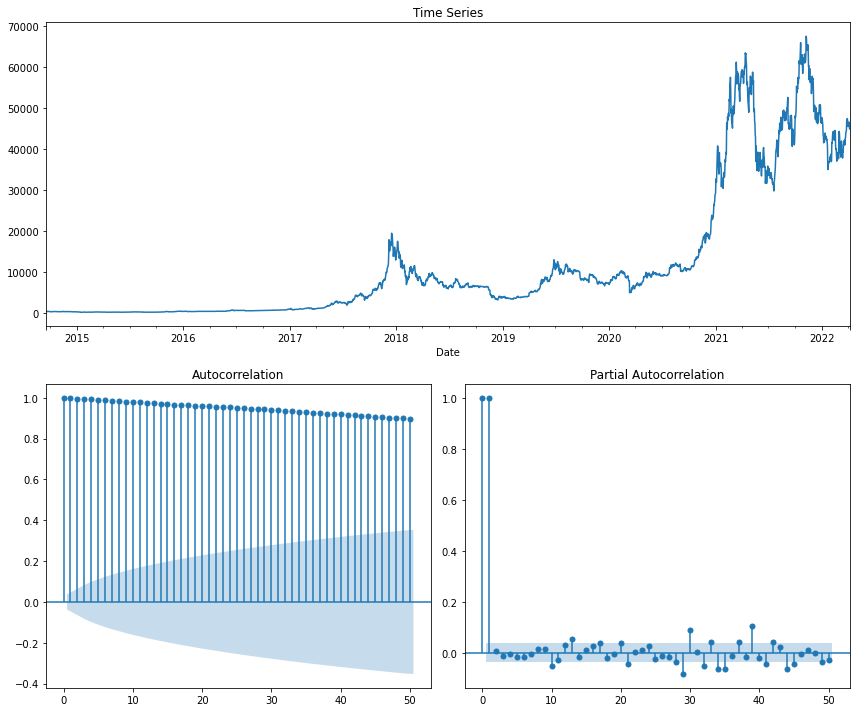

In [5]:
# Display plot of close column and Date index
plotds(df['Close'], nlag = 10)

In [6]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = df.iloc[:125].Close.mean(), df.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = df.iloc[:125].Close.var(), df.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 347.275192, mean2 = 12378.011756
variance1 = 2556.447462, variance2 = 276964258.123521


In [7]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values

adf_result = adfuller(df.Close.tolist())

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.911091
p-value: 0.784298
ADF Statistic: -0.9110910757469554
p-value: 0.7842980275998938


### Quantile

A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. Special quantiles are the quartile (quarter), the quintile (fifth) and percentiles (hundredth).

### Quantile-Quantile (QQ) Plot

In statistics, a Q–Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen.

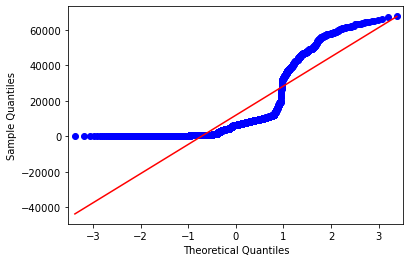

In [8]:
# qqplot for the 'Close' column
x = sm.qqplot(df['Close'], line = 's')

In [9]:
# arma_obj = smtsa.ARMA(df['Close'].tolist(), order=(1, 1)).fit(maxlag=30, method='mle', trend='nc') 

from statsmodels.tsa.arima_model import ARMA

# CAll ARMA function to train the model on the 'Close' price
model = ARMA(df['Close'].tolist(), order = (1, 1))

# Train ARMA Model on the 'Close' price dataset
results_AR = model.fit(maxlag = 30, method = 'mle')

### Maximum Likelihood Estimation (mle)


In [10]:
# Store one difference value of the 'Close' column
first_order_diff = df['Close'].diff(1)

# Display the first five records
first_order_diff.head()

Date
2014-09-17          NaN
2014-09-18   -32.894012
2014-09-19   -29.644012
2014-09-20    14.108002
2014-09-21   -10.082977
Name: Close, dtype: float64

In [11]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2014-09-18   -32.894012
2014-09-19   -29.644012
2014-09-20    14.108002
2014-09-21   -10.082977
2014-09-22     3.330994
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of BTC during Jan 2014-Dec 2022')

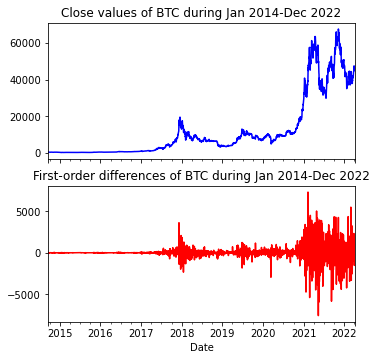

In [12]:
# Declare the fig and ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of BTC during Jan 2014-Dec 2022')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of BTC during Jan 2014-Dec 2022')

ADF Statistic: -8.723754
p-value: 0.000000
ADF Statistic: -0.9110910757469554
p-value: 0.7842980275998938


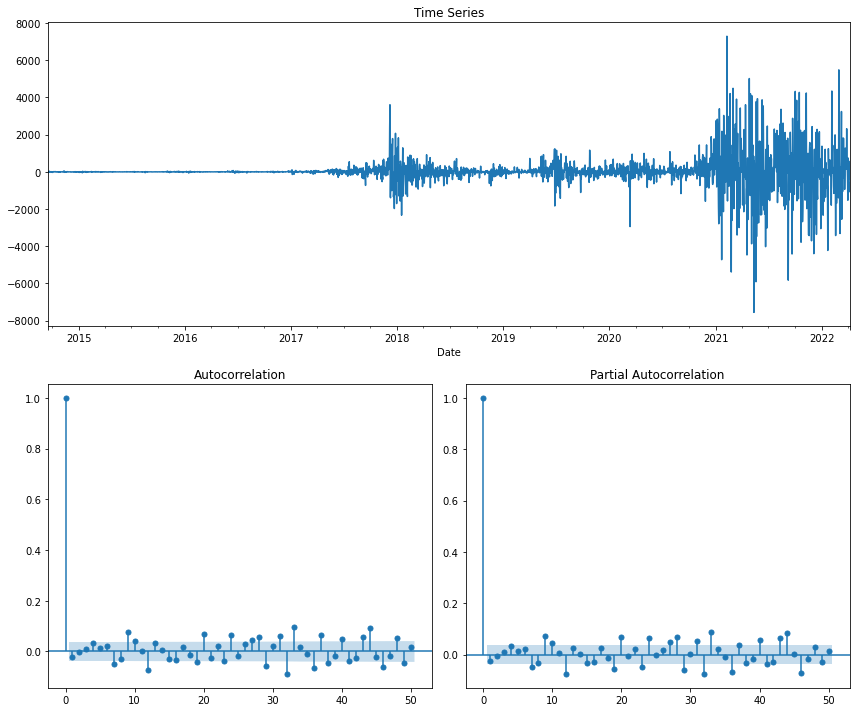

In [13]:
# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)



# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

In [14]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['Close'].tolist(), order = (ari, d, maj))
                arima_obj_fit = arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

print(aicVal)

[[0, 1, 0, 44631.63240287292], [0, 1, 1, 44632.14665716035], [0, 1, 2, 44634.11883483263], [1, 1, 0, 44632.157962315396], [1, 1, 1, 44634.13312365694], [1, 1, 2, 44636.103141431515], [2, 1, 0, 44634.1068701881], [2, 1, 1, 44636.09276412168], [2, 1, 2, 44604.62924111063], [0, 2, 0, 46590.15447994891], [0, 2, 1, 44625.549481326736], [0, 2, 2, 44626.06997532056], [1, 2, 0, 45763.39165988288], [1, 2, 1, 44626.081168198856], [1, 2, 2, 44628.056647926336], [2, 2, 0, 45413.599112695105], [2, 2, 1, 44628.03064582784], [2, 2, 2, 44629.972689789895]]


In [15]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(df['Close'].tolist(), order = (0, 2, 1))

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit(disp = 0)

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 2757
Model:                 ARIMA(0, 2, 1)   Log Likelihood              -22309.775
Method:                       css-mle   S.D. of innovations            789.715
Date:                Wed, 06 Apr 2022   AIC                          44625.549
Time:                        12:58:42   BIC                          44643.315
Sample:                             2   HQIC                         44631.967
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0171      0.019      0.908      0.364      -0.020       0.054
ma.L1.D2.y    -1.0000      0.001   -993.058      0.000      -1.002      -0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

* <b>aic</b>: Akaikes Information Criterion: Estimator of the relative quality of statistical models for a given set of data. The aic deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.



* <b>bic</b>: Bayesian Information Criterion: Similar to the aic, but with a larger penalty term for the number of parameters in the model.
* <b>Hannan–Quinn information criterion (HQC)</b> is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

In [17]:
# Declare the array 'pred' and append the values 
pred = np.append([0, 0], arima_obj_fit.fittedvalues.tolist())

# Add a new column 'ARIMA' into dataframe
df['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = np.append([0, 0], arima_obj_fit.resid + arima_obj_fit.fittedvalues)

# Add a column 'diffval' into dataframe
df['diffval'] = diffval

# Display first five records
df.head()

,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.000000,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.000000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.017144,3.250000
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,-1.599283,43.752014
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-30.217054,-24.190979


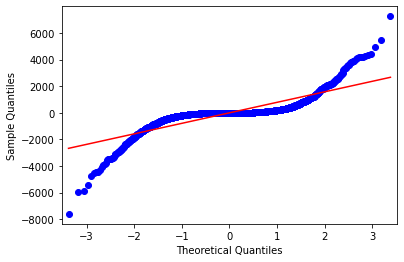

In [18]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [19]:
print(df['diffval'], df['ARIMA'])

Date
2014-09-17       0.000000
2014-09-18       0.000000
2014-09-19       3.250000
2014-09-20      43.752014
2014-09-21     -24.190979
                 ...     
2022-04-02   -1155.664062
2022-04-03     997.312500
2022-04-04    -415.507812
2022-04-05   -1235.792969
2022-04-06     446.472656
Name: diffval, Length: 2759, dtype: float64 Date
2014-09-17       0.000000
2014-09-18       0.000000
2014-09-19       0.017144
2014-09-20      -1.599283
2014-09-21     -30.217054
                 ...     
2022-04-02    -702.715611
2022-04-03     452.801126
2022-04-04    -544.296584
2022-04-05    -128.724897
2022-04-06    1106.683668
Name: ARIMA, Length: 2759, dtype: float64


In [20]:
# Display first 5 records
df.head()

,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.000000,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.000000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.017144,3.250000
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,-1.599283,43.752014
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-30.217054,-24.190979


In [21]:
# Display the last column (diffval) starting from row no. 3
df['diffval'].iloc[2:]

Date
2014-09-19       3.250000
2014-09-20      43.752014
2014-09-21     -24.190979
2014-09-22      13.413971
2014-09-23      30.307983
                 ...     
2022-04-02   -1155.664062
2022-04-03     997.312500
2022-04-04    -415.507812
2022-04-05   -1235.792969
2022-04-06     446.472656
Name: diffval, Length: 2757, dtype: float64

Text(0, 0.5, 'Closing')

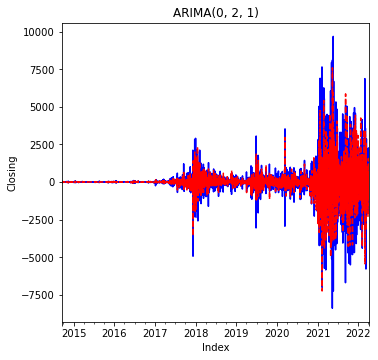

In [22]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
df['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
df['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

## Confidence interval
One of the commonly asked questions in forecasting is, <b>What is the confidence interval for estimates? </b> The confidence level in a forecasting model is defined by the alpha parameter in the forecast function. The alpha value 0.05 represents an estimate with 95% confidence, which can be interpreted as the estimates returned by the model have 5% probability of not falling in the defined distribution range. The confidence interval is evaluated as follows:

## SARIMA

<AxesSubplot:xlabel='Date'>

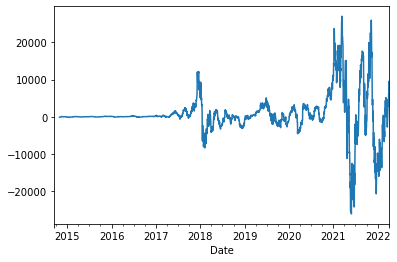

In [25]:
# Calculate the difference by shifting the data
x = df['Close'] - df['Close'].shift(42)

# Plot the data
x.plot()

In [26]:
# Calculate the difference between the 'Close' price and after shifting of the 'Close' price
x = df['Close'] - df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(df['Close'], trend = 'n', order = (0, 2, 1), seasonal_order = (1, 1, 1, 42))
sarimax= mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2759
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood              -22053.221
Date:                            Wed, 06 Apr 2022   AIC                          44114.441
Time:                                    13:00:30   BIC                          44138.068
Sample:                                09-17-2014   HQIC                         44122.983
                                     - 04-06-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.010   -102.226      0.000      -1.019      -0.981
ar.S.L42      -0.0326      0.010     -3.379      0.001      -0.051      -0.014
ma.S.L42      -0.9821      0.008   -125.074      0.000      -0.997      -0.967
sigma2      6.342e+05   1.54e-08   4.11e+13      0.000    6.34e+05    6.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):             37559.72
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):            4814.75   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.1e+26. Standard errors may be unstable.
"""